In [89]:
# importing necessary files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [90]:
customer_data=pd.read_csv("marketing_campaign.csv", sep="\t")
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [91]:
print('Number of datapoints in the dataset: ', len(customer_data))
print('Number of rows {} and columns {}:' .format(customer_data.shape[0],customer_data.shape[1]))
print('Column names:', customer_data.columns)

Number of datapoints in the dataset:  2240
Number of rows 2240 and columns 29:
Column names: Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [92]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [93]:
#Prints the size of the dataset
print('Dataset Shape:', customer_data.shape)

#Check if any columns contain null
print('Total Nulls Per Column:')
print(customer_data.isnull().sum())

Dataset Shape: (2240, 29)
Total Nulls Per Column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [94]:
# check for missing values
customer_data.isna().sum()[customer_data.isna().sum() > 0]

Income    24
dtype: int64

In [95]:
customer_data[pd.isna(customer_data['Income'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [96]:
#checking if there is any duplicate data
customer_data.duplicated().sum()

0

In [97]:
# Drop rows with null values
customer_data.dropna(inplace=True)

# Check for any remaining null values
customer_data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [98]:
customer_data=customer_data.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [99]:
#Calculate percent of responses
percent_of_responses = customer_data.Response.sum()
total = customer_data.shape[0]
percent = round((percent_of_responses / total)*100, 2)

print(percent_of_responses, 'customers responded to the marketing campaign out of a total of', total, 'cutomers.')
print('Percent Responded: ' +  str(percent) + '%')

333 customers responded to the marketing campaign out of a total of 2216 cutomers.
Percent Responded: 15.03%


In [100]:
customer_data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')

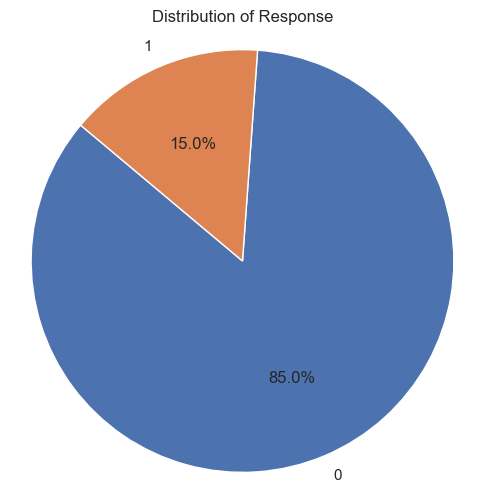

In [101]:
#Plotting pie graph to look for the percentage of disease
response_counts = customer_data["Response"].value_counts()
temp_df = pd.DataFrame({
    "Response": response_counts.index,
    "Counts": response_counts.values
})
plt.figure(figsize=(6, 6)) 
plt.pie(temp_df["Counts"], labels=temp_df["Response"], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Response')  
plt.show()

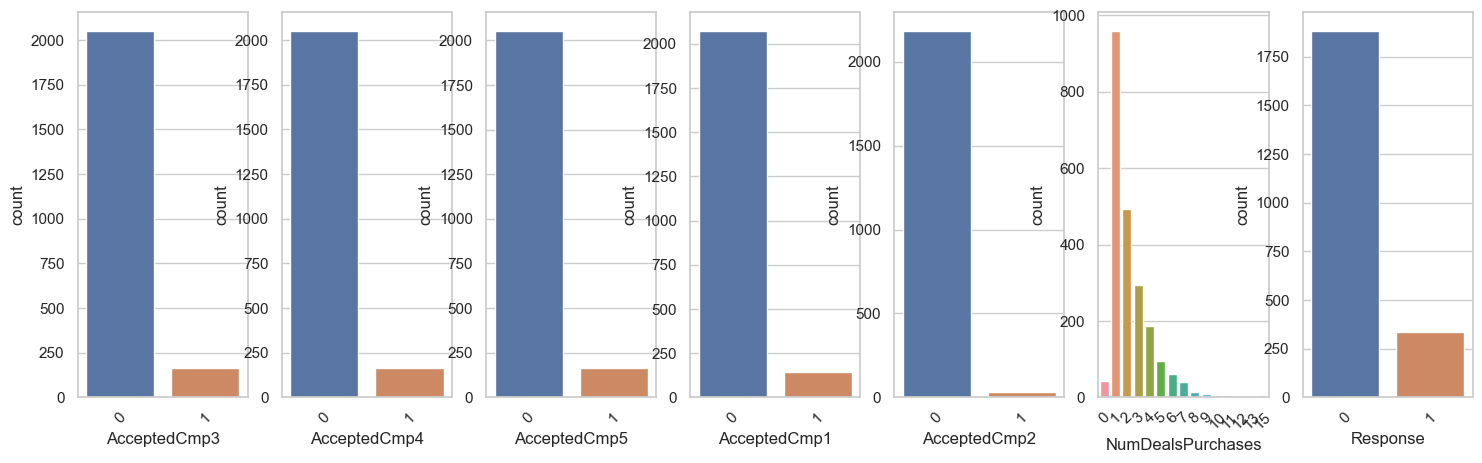

In [102]:
# plotting the promotion features
promotion_features = customer_data.columns[(customer_data.columns.map(lambda x: 'Accepted' in x))].to_list()
promotion_features.append('NumDealsPurchases')
promotion_features.append('Response')

fig, ax = plt.subplots(1, len(promotion_features), figsize=(18, 5))
for col in enumerate(promotion_features):
    sns.countplot(data=customer_data, x=col[1], ax=ax[col[0]])
    ax[col[0]].tick_params(axis='x', rotation=45)
plt.show()

In [103]:
customer_data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,10,4,7,0,0,0,0,0,0,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,1,2,5,0,0,0,0,0,0,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,2,10,4,0,0,0,0,0,0,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,4,6,0,0,0,0,0,0,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,3,4,5,0,0,0,0,0,0,0
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,2,5,7,0,0,0,1,0,0,0
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,3,13,6,0,1,0,0,0,0,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,5,10,3,0,0,0,0,0,0,0


In [104]:
# Exploring the unique values in the categorical features
print("Total categories in the feature Marital_Status:\n", customer_data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", customer_data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


In [105]:
# Getting list of categorical variables
## variable categorical_variable contains the names of coulmns whose data type is object
cat_var = (customer_data.dtypes == 'object')
categorical_variable = list(cat_var[cat_var].index)

print("Categorical variables in the dataset:", categorical_variable)

Categorical variables in the dataset: ['Education', 'Marital_Status']


In [106]:
print('Before label encoding')
print(customer_data[['Education', 'Marital_Status']])

# Label Encoding the object dtypes.
LE=LabelEncoder()
for i in  categorical_variable:
    customer_data[i]=customer_data[[i]].apply(LE.fit_transform)


print('After label encoding')
print(customer_data[['Education', 'Marital_Status']])

Before label encoding
       Education Marital_Status
0     Graduation         Single
1     Graduation         Single
2     Graduation       Together
3     Graduation       Together
4            PhD        Married
...          ...            ...
2235  Graduation        Married
2236         PhD       Together
2237  Graduation       Divorced
2238      Master       Together
2239         PhD        Married

[2216 rows x 2 columns]
After label encoding
      Education  Marital_Status
0             2               4
1             2               4
2             2               5
3             2               5
4             4               3
...         ...             ...
2235          2               3
2236          4               5
2237          2               2
2238          3               5
2239          4               3

[2216 rows x 2 columns]


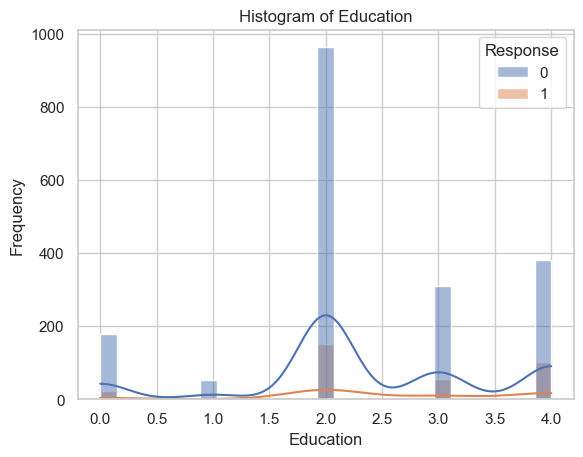

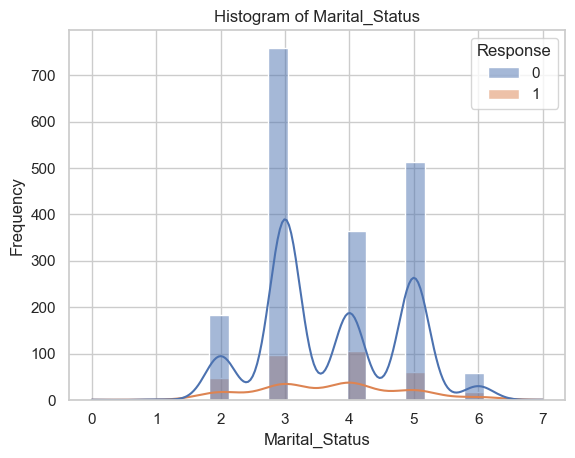

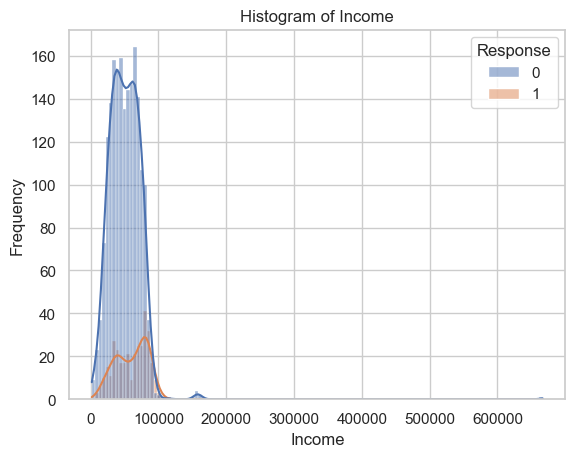

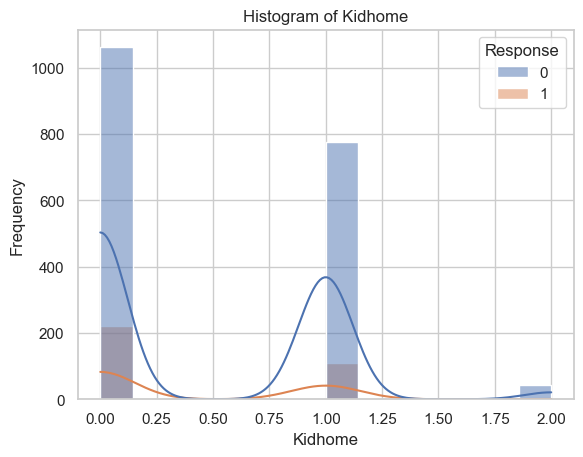

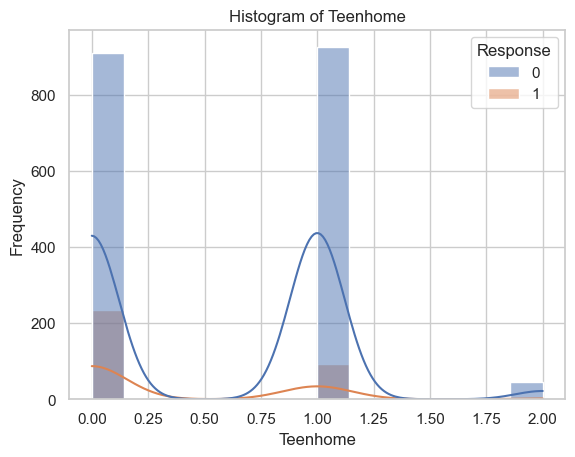

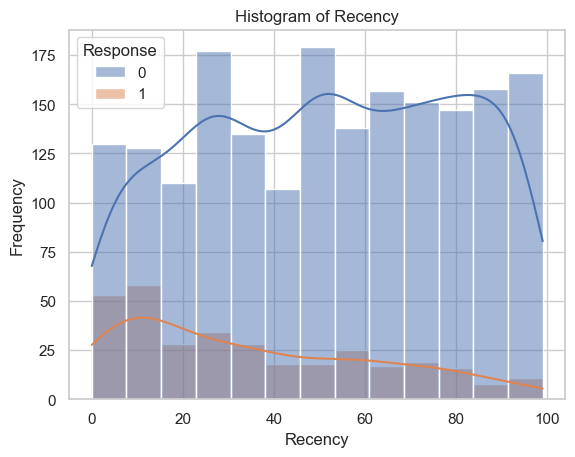

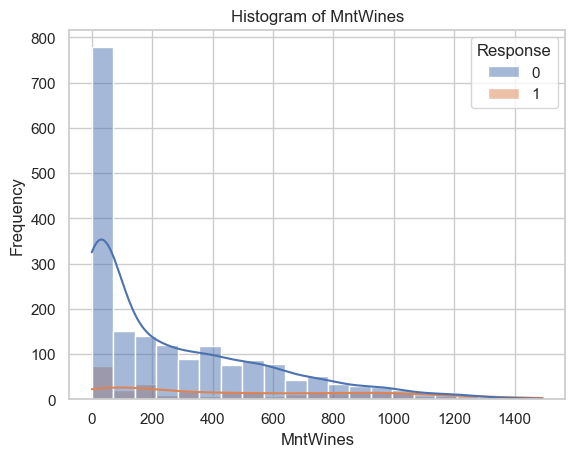

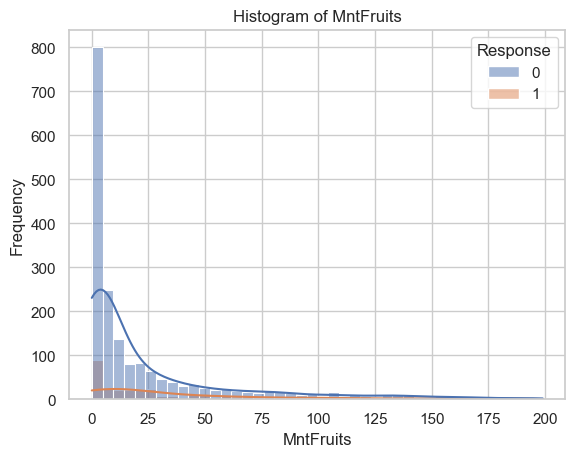

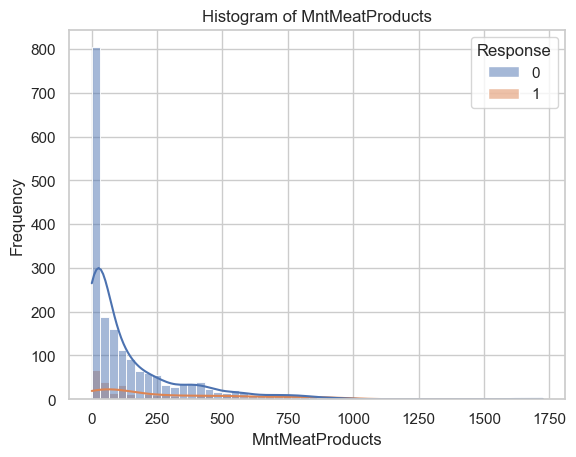

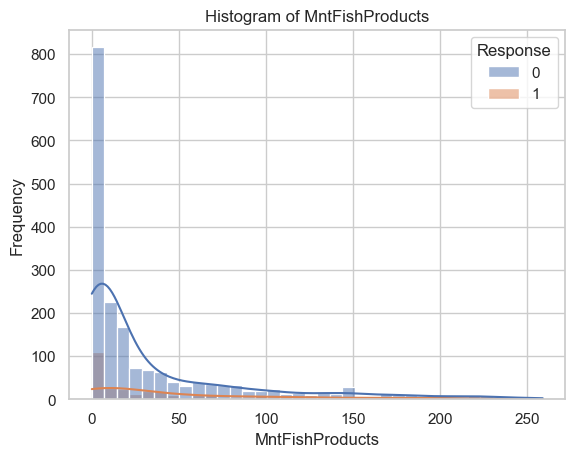

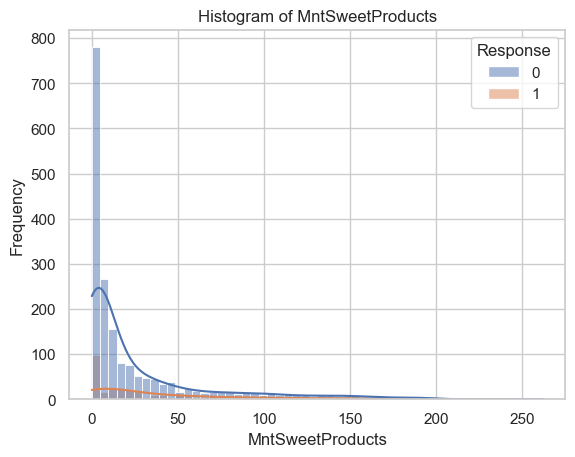

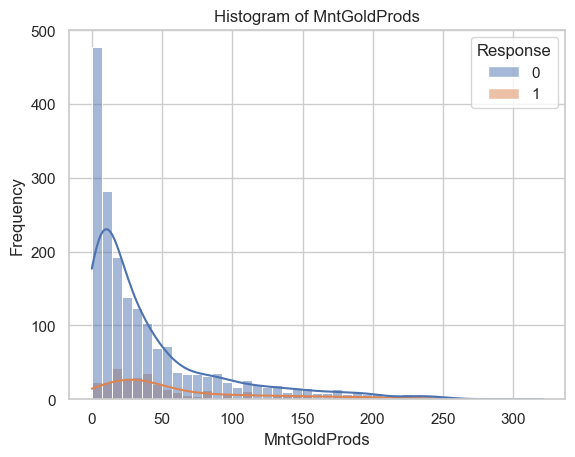

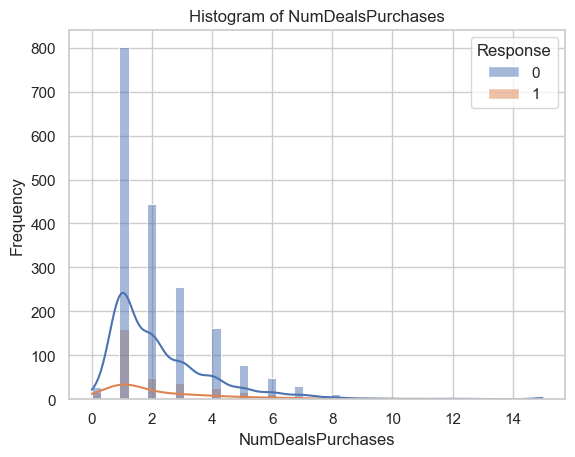

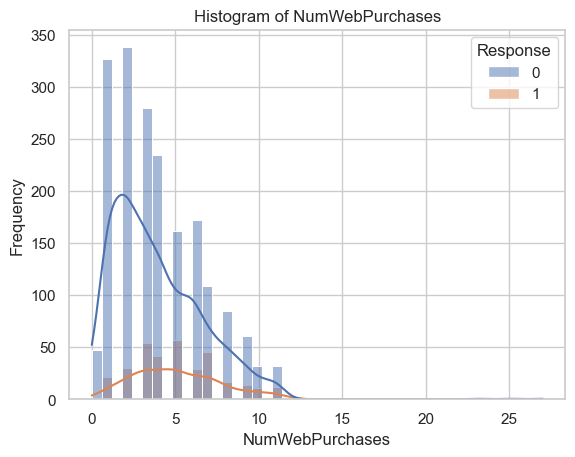

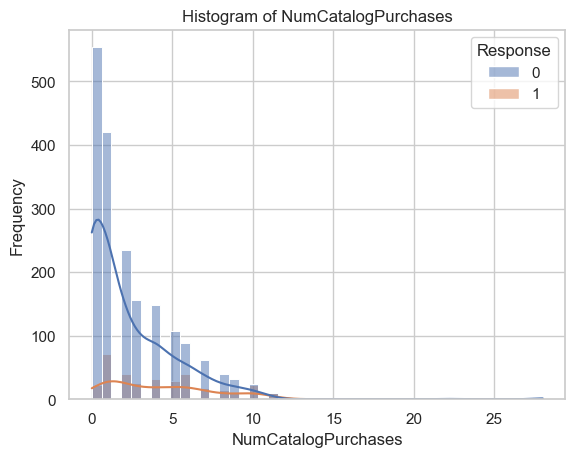

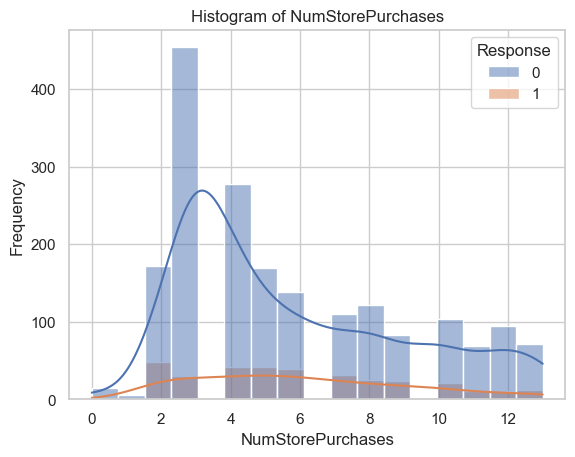

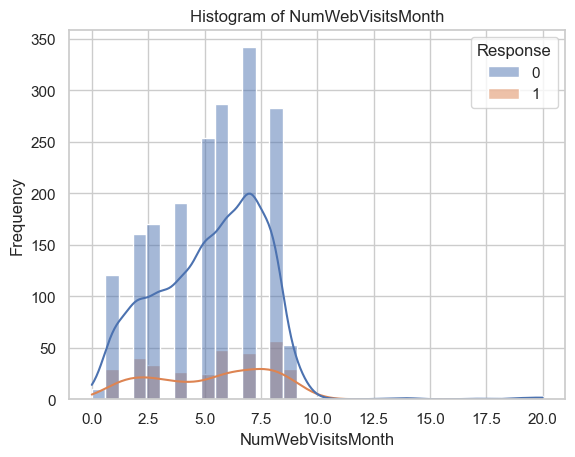

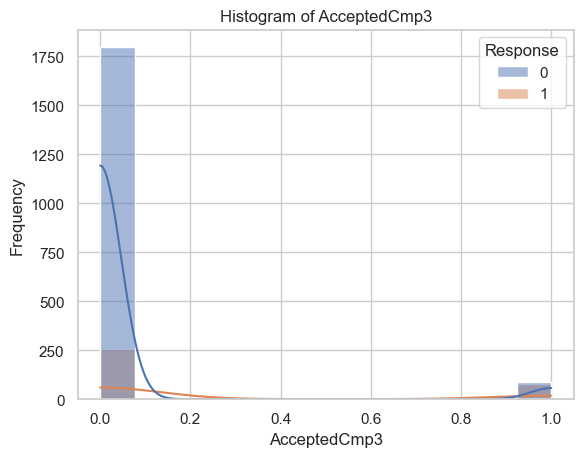

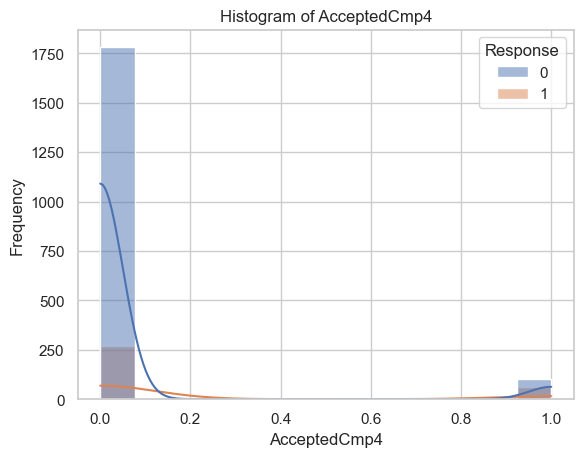

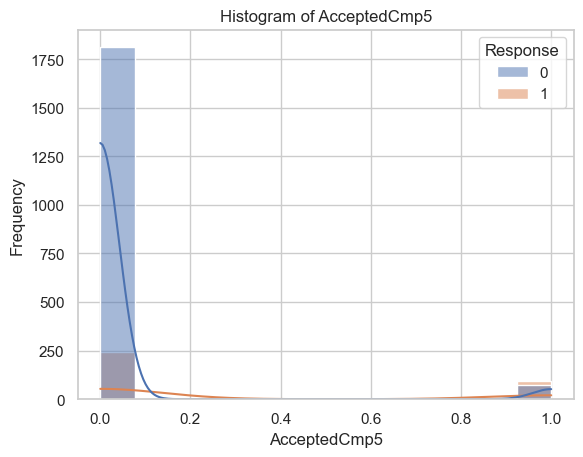

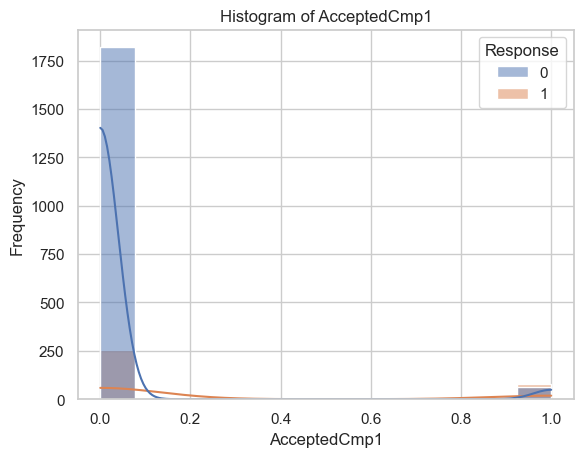

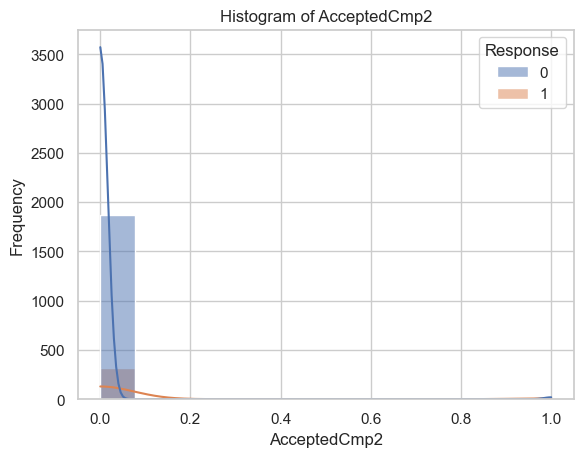

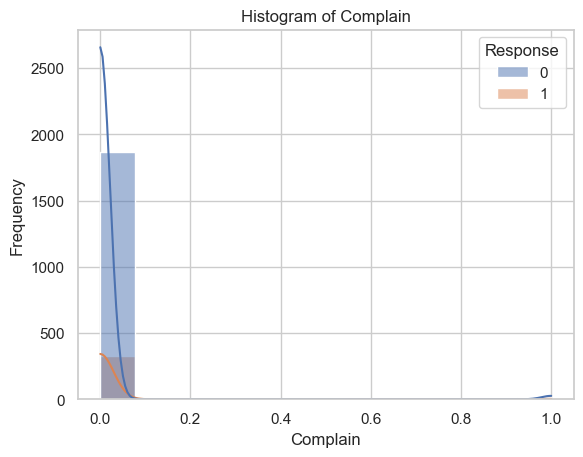

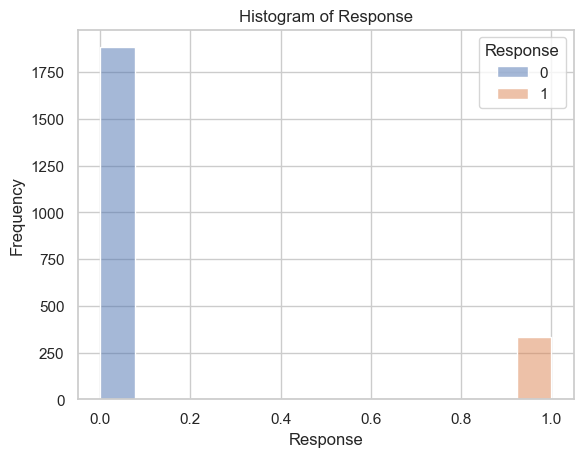

In [107]:
#plotting histplot for all the columns with relation to diagnosis to analyze data in more efficient manner
for i, column in enumerate(customer_data.columns):
    sns.histplot(data=customer_data, x=column,hue='Response', kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()